In [1]:
!pip install pandas matplotlib seaborn scikit-learn beautifulsoup4 requests

  Using cached pandas-2.2.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (13.1 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 2.1 MB/s eta 0:00:00m eta 0:00:010:00:01
  Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 2.3 MB/s eta 0:00:00m eta 0:00:010:00:01m
  Using cached numpy-2.1.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.3 MB)
  Using cached pytz-2024.2-py2.py3-none-any.whl (508 kB)
  Using cached tzdata-2024.2-py2.py3-none-any.whl (346 kB)
  Using cached contourpy-1.3.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (326 kB)
  Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
  Using cached fonttools-4.55.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (4.9 MB)
  Using cached kiwisolver-1.4.7-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.4 MB)
  Using cached pillow-11.0.0-cp311-cp311-manylinux_2_28_x86_64.whl (4.4 MB)
  Usin

In [2]:
!pip install plotly

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.1/19.1 MB 2.1 MB/s eta 0:00:00m eta 0:00:010:00:01
  Using cached tenacity-9.0.0-py3-none-any.whl (28 kB)


In [4]:
import requests
from bs4 import BeautifulSoup
import json
import pandas as pd

In [5]:
url = 'https://www.bayut.com/for-sale/property/uae/'
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')

script_tag = soup.find('script', type='application/ld+json')
data_json = json.loads(script_tag.string)

listings = []
for item in data_json['itemListElement']:
    property_data = item['mainEntity']
    title = property_data['name']
    price = property_data['offers'][0]['priceSpecification']['price']
    location = property_data['address']['addressLocality']
    size = property_data['floorSize']['value']
    link = property_data['url']
    listings.append({'Title': title, 'Price (AED)': price, 'Location': location, 'Size (SQFT)': size, 'Link': link})

df = pd.DataFrame(listings)
display(df)
df.to_csv('uae_real_estate_listings.csv', index=False)

,Title,Price (AED),Location,Size (SQFT),Link
0,Fully Upgraded | Burj Khalifa View | Vacant,4150000,Downtown Dubai,"1,517",https://www.bayut.com/property/details-1026479...
1,STUDIO FOR SALE | 5 YEARS PAYMENT PLAN | LUXUR...,643000,Dubai Residence Complex,488,https://www.bayut.com/property/details-1029321...
2,🚨BRAND NEW | LUXURY UNIT | SPACIOUS 1BHK | PRI...,1099999,Jumeirah Village Circle (JVC),640,https://www.bayut.com/property/details-1026986...
3,Exclusive - Elegant Unit ! Pool View ! Vacant ...,800000,Jumeirah Village Circle (JVC),747,https://www.bayut.com/property/details-1029179...
4,Full Canal View | Vacant | Spacious,4500000,Al Wasl,"1,327",https://www.bayut.com/property/details-9447154...
5,Rented Unit | Good Investment | Prime Location,690000,Jumeirah Village Circle (JVC),664,https://www.bayut.com/property/details-1019867...
6,Closed Kitchen I High Floor I Vacant,700000,Dubai Production City (IMPZ),958,https://www.bayut.com/property/details-1014807...
7,VD1 | Vacant 5BR | Large Plot | Park Views,10995000,DAMAC Hills,"5,400",https://www.bayut.com/property/details-1017956...
8,Post Handover Payment Plan | Fully Furnished i...,1112000,Jumeirah Village Circle (JVC),803,https://www.bayut.com/property/details-1029167...
9,Exclusive | High Floor | Unfurnished,1250000,Dubai Hills Estate,478,https://www.bayut.com/property/details-1015353...


In [6]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        24 non-null     object
 1   Price (AED)  24 non-null     int64 
 2   Location     24 non-null     object
 3   Size (SQFT)  24 non-null     object
 4   Link         24 non-null     object
dtypes: int64(1), object(4)
memory usage: 1.1+ KB


In [9]:
df['Size (SQFT)'] = df['Size (SQFT)'].str.replace(',', '').astype(float)

In [10]:
avg_price = df['Price (AED)'].mean()
avg_size = df['Size (SQFT)'].mean()

print(f'Average Price: AED {avg_price:,.2f}')
print(f'Average Size: {avg_size:.2f} SQFT')

Average Price: AED 2,381,782.29
Average Size: 1535.29 SQFT


In [8]:
downtown_properties = df[df['Location'] == 'Downtown Dubai']
high_value_properties = df[df['Price (AED)'] > 3_000_000]

display(downtown_properties.head())

,Title,Price (AED),Location,Size (SQFT),Link
0,Fully Upgraded | Burj Khalifa View | Vacant,4150000,Downtown Dubai,"1,517",https://www.bayut.com/property/details-1026479...


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

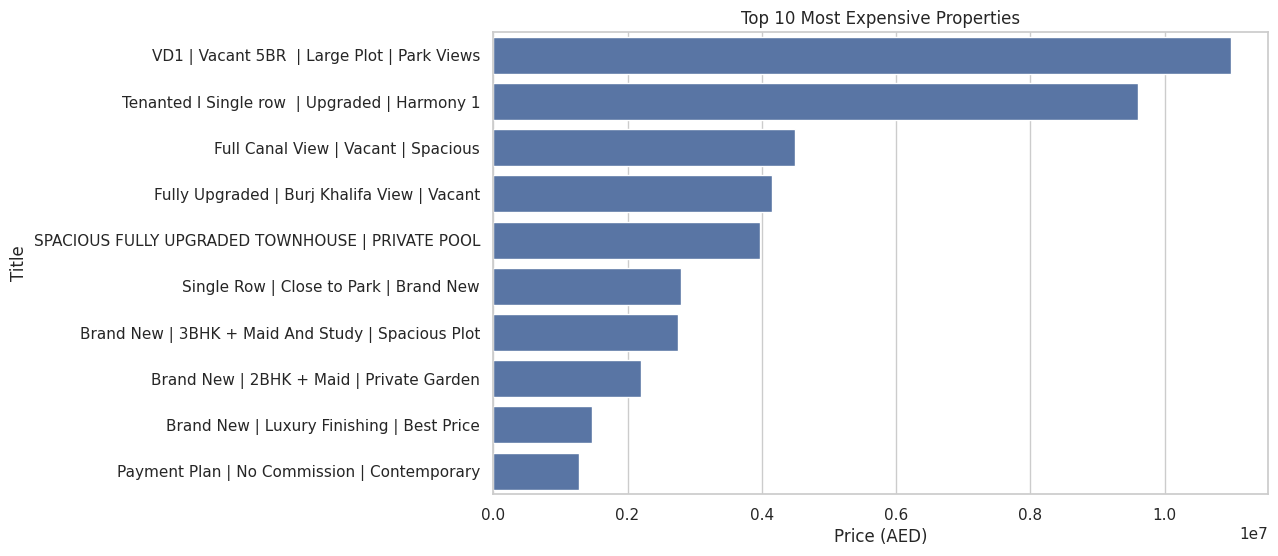

In [12]:
top_10_expensive = df.sort_values(by='Price (AED)', ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x='Price (AED)', y='Title', data=top_10_expensive)
plt.title('Top 10 Most Expensive Properties')
plt.show()

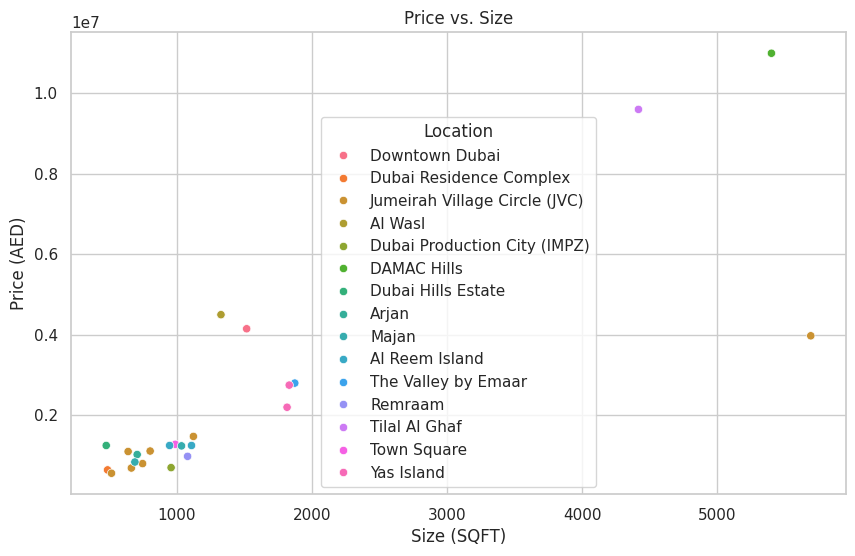

In [13]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Size (SQFT)', y='Price (AED)', hue='Location', data=df)
plt.title('Price vs. Size')
plt.show()